In [1]:
import os
import numpy as np
import random
import cv2
import tensorflow as tf
import tensorflow.keras.backend as K

In [2]:
train_data_loc = r"E:\PyImage_ComputerVision\SiameseNetworks\WorkingData\InputData\10_food_classes_all_data\train"
test_data_loc = r"E:\PyImage_ComputerVision\SiameseNetworks\WorkingData\InputData\10_food_classes_all_data\test"

In [3]:
def count_total_number_of_files(data_loc):
    total_num = 0
    for label in os.listdir(data_loc):
        label_folder_loc = os.path.join(train_data_loc,label)
        tree=os.walk(label_folder_loc,topdown=True)
        top_branch=next(tree)
        total_num += len(top_branch[2])
    return total_num

In [4]:
def return_image(image_loc):
    img = cv2.imread(image_loc)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(128,128),interpolation=cv2.INTER_AREA)
    img = tf.cast(img,dtype=tf.float32)
    img = img/255.0
    return img

In [5]:
def create_pairs(data_loc):
    pairs_images = []
    pairs_labels = []
    
    count = 0
    labels = np.array(os.listdir(data_loc))
    for folder in labels:
        folder_loc = os.path.join(data_loc,folder)
        files = os.listdir(folder_loc)
        for file in files:
            file_loc = os.path.join(folder_loc,file)
            file_img = return_image(file_loc)
            
            pos_img_file = random.choice(files)
            pos_img_loc = os.path.join(folder_loc,pos_img_file)
            pos_img = return_image(pos_img_loc)
            pairs_images.append([file_img,pos_img])
            pairs_labels.append([1])
            
            neg_img_folder = random.choice(np.where(labels != folder)[0])
            neg_img_file = random.choice(os.listdir(os.path.join(data_loc,labels[neg_img_folder])))
            neg_img_loc = os.path.join(data_loc,labels[neg_img_folder],neg_img_file)
            neg_img = return_image(neg_img_loc)
            pairs_images.append([file_img,neg_img])
            pairs_labels.append([0])
    return np.array(pairs_images),np.array(pairs_labels)

In [6]:
def show_pairs(images,labels):
    for i in range(len(images)):
        pair = images[i]
        label = labels[i][0]
        image_combined = np.hstack((pair[0],pair[1]))
        image_combined = cv2.cvtColor(image_combined,cv2.COLOR_RGB2BGR)
        cv2.imshow(f"{label}",image_combined)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [ ]:
a,b = create_pairs(train_data_loc)

In [25]:
show_pairs(a,b)

In [35]:
fg = np.array(os.listdir(train_data_loc))

In [36]:
fg

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [37]:
np.where(fg!='chicken_curry')

(array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)

In [44]:
random.choice(np.where(fg!='chicken_curry')[0])

7

In [19]:
os.listdir(r"E:\PyImage_ComputerVision\SiameseNetworks\WorkingData\InputData\10_food_classes_all_data\train\chicken_curry")

['1004867.jpg',
 '1014843.jpg',
 '1022681.jpg',
 '1027623.jpg',
 '102896.jpg',
 '1040283.jpg',
 '104874.jpg',
 '1051025.jpg',
 '105113.jpg',
 '1052361.jpg',
 '1065322.jpg',
 '1067426.jpg',
 '1068592.jpg',
 '1071242.jpg',
 '1085387.jpg',
 '1110023.jpg',
 '1116408.jpg',
 '11207.jpg',
 '1131377.jpg',
 '1133357.jpg',
 '1140085.jpg',
 '1147844.jpg',
 '1149623.jpg',
 '116147.jpg',
 '1165360.jpg',
 '1166612.jpg',
 '1170533.jpg',
 '1173563.jpg',
 '1176086.jpg',
 '1179201.jpg',
 '118163.jpg',
 '1190829.jpg',
 '1199426.jpg',
 '1199781.jpg',
 '1202337.jpg',
 '1206473.jpg',
 '1211378.jpg',
 '1218811.jpg',
 '1238337.jpg',
 '1243503.jpg',
 '124904.jpg',
 '1251235.jpg',
 '1251752.jpg',
 '1254768.jpg',
 '1270258.jpg',
 '127152.jpg',
 '1274390.jpg',
 '1283845.jpg',
 '1285185.jpg',
 '1285249.jpg',
 '128873.jpg',
 '1291001.jpg',
 '129543.jpg',
 '1299746.jpg',
 '1303435.jpg',
 '1308976.jpg',
 '1330735.jpg',
 '1331774.jpg',
 '1336513.jpg',
 '1342294.jpg',
 '1344942.jpg',
 '1345866.jpg',
 '1349027.jpg',
 '1

In [23]:
tree=os.walk(r"E:\PyImage_ComputerVision\SiameseNetworks\WorkingData\InputData\10_food_classes_all_data\train\chicken_curry",topdown=True)
top_branch=next(tree)
print(len(top_branch[2]))

750


In [25]:
count_total_number_of_files(train_data_loc)

7500

In [3]:
fg = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [8]:
a = fg[0]
b = fg[1]

In [11]:
a1 = a[0]
a2 = a[1]

In [13]:
type(a1)

numpy.ndarray

In [14]:
a1.shape

(60000, 28, 28)

In [15]:
a2.shape

(60000,)

In [16]:
type(a2)

numpy.ndarray

In [26]:
(trainX,trainY),(testX,testY) = fg

In [27]:
ul = np.unique(trainY)

In [28]:
ul

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [31]:
idx = [np.where(trainY == i)[0] for i in range(0, len(ul))]

In [32]:
idx

[array([    1,    21,    34, ..., 59952, 59972, 59987], dtype=int64),
 array([    3,     6,     8, ..., 59979, 59984, 59994], dtype=int64),
 array([    5,    16,    25, ..., 59983, 59985, 59991], dtype=int64),
 array([    7,    10,    12, ..., 59978, 59980, 59996], dtype=int64),
 array([    2,     9,    20, ..., 59943, 59951, 59975], dtype=int64),
 array([    0,    11,    35, ..., 59968, 59993, 59997], dtype=int64),
 array([   13,    18,    32, ..., 59982, 59986, 59998], dtype=int64),
 array([   15,    29,    38, ..., 59963, 59977, 59988], dtype=int64),
 array([   17,    31,    41, ..., 59989, 59995, 59999], dtype=int64),
 array([    4,    19,    22, ..., 59973, 59990, 59992], dtype=int64)]

In [34]:
np.where(trainY == 0)[0]

array([    1,    21,    34, ..., 59952, 59972, 59987], dtype=int64)

# Siamese Network

## Siamese Network is a Special Class of Neural Network which have the following Characterstics:-

### -->They contain two Identical Two or More Identical Sub Nueral Networks.
### -->These Sub Nueral Networks have the same `Architecture` , `Parameters` , `Weights`.
### -->All Update of Wieghts are Mirrored Across both the Sub-Networks , Meaning If Wieghts are Updated on One Network , Then the Wieghts are Updated in The Other Networks as well and in the Same Way too.

## We use Siamese Networks mainly when Performing `Verification` , `Identification` , 

## `Recognition` Tasks.Example:- `Facial Recogntion` and `Signature Verification`.

#### ---------------------------------------------------------------------------------------------------------------------------------------------------

## Using Siamese Network Considering Signature Verification Tasks 

### -->Normally We would try to Train a Classification Model to Correctly Classify Signature for each Individual,Which would Require a Bigger Training Dataset.

### -->Hence if we use Siamese Network , We will take a Set of Two Signature Images and Ask whether they are Same or Not
### ----->If the Two Signature Images are Same , then Siamese Network will Predict Result Equavalent to `YES`.
### ----->If the Two Signature Images are Not Same , then Siamese Network will Predict Result Equavalent to `NO`.

### Using Siamese Networks requires `Far Less Training Data` and Produce `Far More Accurate Results`.

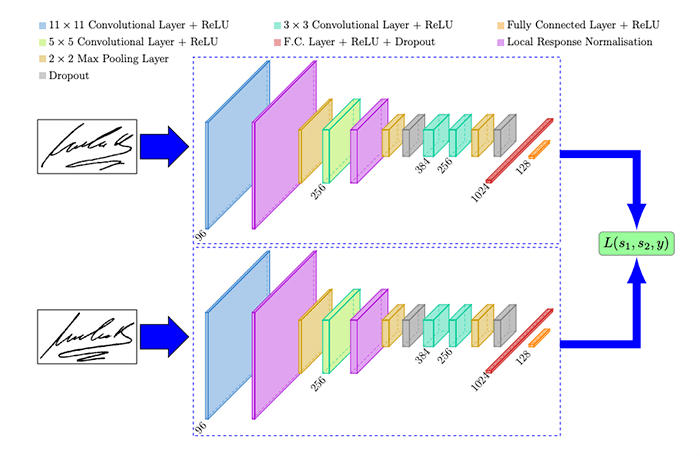

## The Above Image is an Example of Siamese Network(SignNet) used for Signature Verification

### -->In the Middle are the Two `Sister Network` that have Same Architecture , Parameters and Mirror each other.
### -->The Final Layer in these `Sister Networks` are Embeddings Layer which we Use to Calculate the `Euclidean Distance` Between the Two Outputs , This Distance is Further Used to Produce the Resul Required.
### -->At last we have the `Loss Function` which help us to Train our Siamese Network.

#### ---------------------------------------------------------------------------------------------------------------------------------------------------

## Popular Used Loss Function when Training Siamese Network are:-

### -->Binary Cross-Entropy
### -->Contrastive Loss
### -->Triplet Loss

## **Note:-There are Many Implementation of Siamese Network in this Notebook we will use Image Pair Siamese Network

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

# Implementing Image Pair Siamese Network 

### In Image Pair Siamese Network we have a Two Sister Network , who receive Two Inputs(One for Each Sister Network).

### When Training Siamese Network we nedd to have Two Types of Image Pairs in our Training Data:-

### < `Positive Pair` >:-The Two Images that Belong to Same Class.Example:-Two Example Image of Same Signature,Two Images of Same Person.

### < `Negetive Pair` >:-The Two Images that belong to Different Class.Example:-Two Example Images of Different Signature,Two Images of Different Person.

#### ---------------------------------------------------------------------------------------------------------------------------------------------------

## -->In the Following Code we will Generate Image Pairs from the Data which will be Further Used to Train our Saimese Network 

In [7]:
trainX,trainY = create_pairs(train_data_loc)

In [8]:
testX,testY = create_pairs(test_data_loc)

In [8]:
trainX.shape

(15000, 2, 128, 128, 3)

In [9]:
def build_sister_networks(input_shape):
    
    inputs = tf.keras.layers.Input(input_shape)
    
    x = tf.keras.layers.Conv2D(64,2,activation="relu")(inputs)
    x = tf.keras.layers.MaxPooling2D(2)(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    
    x = tf.keras.layers.Conv2D(64,2,activation="relu")(x)
    x = tf.keras.layers.MaxPooling2D(2)(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    output = tf.keras.layers.Dense(48)(x)
    
    model = tf.keras.Model(inputs,output)
    return model

In [10]:
def calculate_euclidean_distance(vec):
    vec1,vec2 = vec
    sq_sum = tf.keras.backend.sum(tf.keras.backend.square(vec1 - vec2),axis=1,keepdims=True)
    return tf.keras.backend.sqrt(tf.keras.backend.maximum(sq_sum,tf.keras.backend.epsilon()))

In [11]:
def euclidean_distance(vectors):
    # unpack the vectors into separate lists
    (featsA, featsB) = vectors

    # compute the sum of squared distances between the vectors
    sumSquared = K.sum(K.square(featsA - featsB), axis=1,
        keepdims=True)

    # return the euclidean distance between the vectors
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))

In [12]:
imgA = tf.keras.layers.Input(shape=(128,128,3))
imgB = tf.keras.layers.Input(shape=(128,128,3))
Feature_Model = build_sister_networks((128,128,3))
embA = Feature_Model(imgA)
embB = Feature_Model(imgB)
distance = tf.keras.layers.Lambda(euclidean_distance)([embA,embB])
output = tf.keras.layers.Dense(1,activation="sigmoid")(distance)

model = tf.keras.Model(inputs=[imgA,imgB],outputs=output)

In [13]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

NameError: name 'np' is not defined

In [14]:
model.fit([trainX[:,0],trainX[:,1]],trainY,
          epochs=100,
          batch_size=8)

Epoch 1/100
1875/1875 [==============================] - 40s 12ms/step - loss: 0.6930 - accuracy: 0.5131
Epoch 2/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6919 - accuracy: 0.5171
Epoch 3/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6913 - accuracy: 0.5231
Epoch 4/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6914 - accuracy: 0.5256
Epoch 5/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6908 - accuracy: 0.5284
Epoch 6/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6906 - accuracy: 0.5251
Epoch 7/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6905 - accuracy: 0.5247
Epoch 8/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6906 - accuracy: 0.5255
Epoch 9/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6900 - accuracy: 0.5333
Epoch 10/100
1875/1875 [==============================]

KeyboardInterrupt: 

2

In [34]:
trainX.shape

AttributeError: 'list' object has no attribute 'shape'

In [45]:
fg = [[1,2],[3,4],[5,6],[7,8],[9,10]]

In [50]:
fg[

[1, 2]

In [53]:
trainX1.shape

(15000, 2, 224, 224, 3)

In [55]:
trainX1[:,0].shape

(15000, 224, 224, 3)

In [56]:
fg1 = np.array(fg)

In [58]:
fg1[:,0]

array([1, 3, 5, 7, 9])

In [59]:
fg1[:,1]

array([ 2,  4,  6,  8, 10])

In [65]:
trainY1.shape

(15000, 1)

In [66]:
trainY1[:].shape

(15000, 1)